In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('keywords_data.csv')

# Define Domain Mapping for easy iteration
domains = {
    'Yachting Pages': {
        'vis': 'yachting-pages.com_visibility',
        'rank': 'yatchingpages.com_cleaned_rank'
    },
    'Superyacht Times': {
        'vis': 'superyachttimes.com_visibility',
        'rank': 'superyachttimes.com_rank_cleaned'
    },
    'Superyacht Content': {
        'vis': 'superyachtcontent.com_visibility',
        'rank': 'superyachtcontent.com_cleaned_rank'
    },
    'Service Guide': {
        'vis': 'superyachtservicesguide.com_visibility',
        'rank': 'superyachtserviceguide.com_cleaned_rank'
    },
    'Boat International': {
        'vis': 'boatinternational.com_visibility',
        'rank': 'boatinternation.com_cleaned_rank'
    }
}

C:\Users\Sameeha\AppData\Local\Temp\ipykernel_14712\4180899295.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sov_df, x='SoV %', y='Domain', palette='magma')


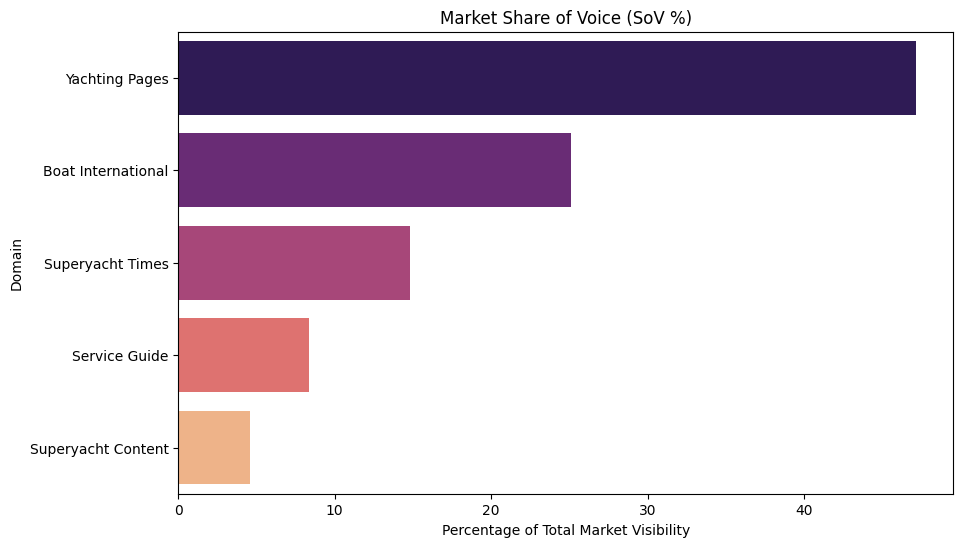

               Domain  Total Visibility      SoV %
0      Yachting Pages         307.45552  47.187544
4  Boat International         163.45017  25.085944
1    Superyacht Times          96.48339  14.808042
3       Service Guide          54.33984   8.339950
2  Superyacht Content          29.83184   4.578520


In [2]:
# Calculate Total Visibility per domain
sov_data = {}
for name, cols in domains.items():
    sov_data[name] = df[cols['vis']].sum()

# Convert to DataFrame
sov_df = pd.DataFrame(list(sov_data.items()), columns=['Domain', 'Total Visibility'])
sov_df['SoV %'] = (sov_df['Total Visibility'] / sov_df['Total Visibility'].sum()) * 100
sov_df = sov_df.sort_values(by='SoV %', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=sov_df, x='SoV %', y='Domain', palette='magma')
plt.title('Market Share of Voice (SoV %)')
plt.xlabel('Percentage of Total Market Visibility')
plt.show()

print(sov_df)

In [3]:
# Define "Ranking" as being in the Top 20
TOP_LIMIT = 20
UNRANKED_LIMIT = 100

# Identify sets of keywords for each domain
ranking_sets = {}
for name, cols in domains.items():
    ranking_sets[name] = set(df[df[cols['rank']] <= TOP_LIMIT]['Keyword'])

# Calculate the "Common Gap"
# Keywords where Boat International AND Superyacht Times rank, but Yachting Pages DOES NOT
comp1 = 'Boat International'
comp2 = 'Superyacht Times'
target = 'Yachting Pages'

gap_keywords = (ranking_sets[comp1] & ranking_sets[comp2]) - ranking_sets[target]

print(f"--- Gap Analysis: {target} vs. The Leaders ---")
print(f"Keywords where both {comp1} and {comp2} rank in Top {TOP_LIMIT}, but {target} is missing: {len(gap_keywords)}")

# Export the Gap List
gap_df = df[df['Keyword'].isin(gap_keywords)].sort_values(by='Search Volume', ascending=False)
gap_df[['Keyword', 'Search Volume', 'Keyword Difficulty', 'CPC']].head(15)

--- Gap Analysis: Yachting Pages vs. The Leaders ---
Keywords where both Boat International and Superyacht Times rank in Top 20, but Yachting Pages is missing: 5


,Keyword,Search Volume,Keyword Difficulty,CPC
436,yacht tender,480,18,1.47
6567,yacht tender,480,18,1.47
4596,yacht tender,480,17,1.47
2625,yacht tender,480,18,1.47
4522,yacht interior design,260,23,2.14
423,yacht interior design,260,15,2.14
2548,yacht interior design,260,17,2.14
6490,yacht interior design,260,17,2.14
6131,yacht tender,170,20,0.84
4160,yacht tender,170,20,0.84


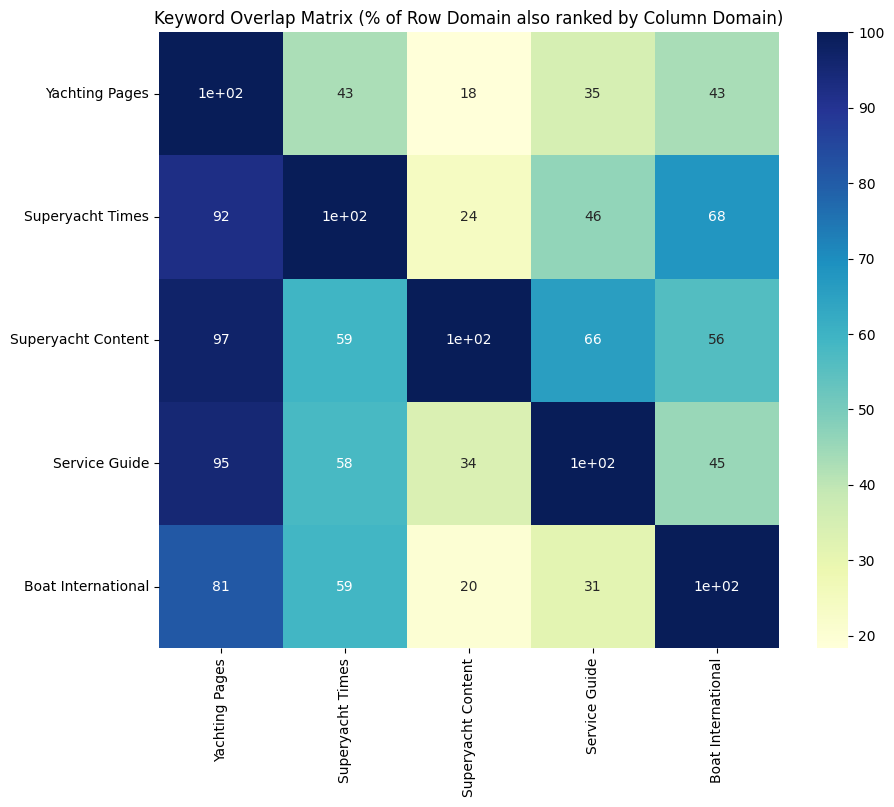

In [4]:
import numpy as np

# Create an empty matrix
matrix_size = len(domains)
overlap_matrix = np.zeros((matrix_size, matrix_size))
domain_names = list(domains.keys())

# Fill the matrix with percentage overlap
for i, d1 in enumerate(domain_names):
    for j, d2 in enumerate(domain_names):
        set1 = ranking_sets[d1]
        set2 = ranking_sets[d2]
        if len(set1) > 0:
            overlap_matrix[i, j] = len(set1 & set2) / len(set1) * 100

# Visualize as Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, annot=True, xticklabels=domain_names, yticklabels=domain_names, cmap='YlGnBu')
plt.title('Keyword Overlap Matrix (% of Row Domain also ranked by Column Domain)')
plt.show()